# Análisis de Datos Faltantes  

In [1]:
# Librerias
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
#import session_info
import upsetplot

In [2]:
# linea para correr el notebook utils
%run utils.ipynb

## Datos. Descarga de archivos desde una URL

#### 1. Creamos unidades de informacion de los conjuntos de datos

In [3]:
# Guardar la url en una variable
datos_url = 'https://github.com/njtierney/naniar/raw/master/data/'

# Almacenar los nombres de los archivos a descargar en una lista
datasets_names = ('oceanbuoys', 'pedestrian', 'riskfactors')

# Almacenar el tipo de extension en una variable
extension = '.rda'

#### 2. Descargar y cargar los conjuntos de datos 

In [4]:
datasets_dfs = {} # diccionario que almacena los archivos descargados

for dataset_name in datasets_names:

    dataset_file = f'{ dataset_name }{ extension }' # almacena el nombre de cada archivo con su respectiva extension
    dataset_output_file = f'./data/{ dataset_file }' # ruta y nombre donde se guarda los arhcivos
    dataset_url = f'{ datos_url }{ dataset_file }' # url de cada archivo a descargar

    !wget -q -O { dataset_output_file } { dataset_url } # linea que descarga los archivos

    # almacenar en el diccionario los archivos descargados
    datasets_dfs[f'{ dataset_name }_df'] = pyreadr.read_r(dataset_output_file).get(dataset_name)

# accede a las llaves del diccionario para verificar que los archivos se hayan cargado
datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

#### 3. Incluir conjunto de datos en nuestro ambiente local

In [5]:
locals().update(**datasets_dfs)
del datasets_dfs # elimina el diccionario dejando los archivos df

In [6]:
riskfactors_df.shape, oceanbuoys_df.shape, pedestrian_df.shape

((245, 34), (736, 8), (37700, 9))

De esta manera podemos obtener varios archivos desde una URL y convertirlos en DataFrame para su procesamiento. El siguiente analisis de valores faltantes se haran sobre el dataframe de factores de riesgo 

## Resumen Basico de Valores Faltantes

In [7]:
# tamano del df
riskfactors_df.shape

(245, 34)

In [8]:
# Cantidad de valores en el dataframe
total = 245*34
total

8330

In [9]:
# Cantidad de valores completos
v_completo = riskfactors_df.missing.number_complete()
v_completo

7144

In [10]:
# Cantidad de valores faltantes
v_faltantes = riskfactors_df.missing.number_missing()
v_faltantes

1186

In [11]:
# Porcentaje de valores faltantes en el dataframe
pct_v = (v_faltantes/v_completo)*100
pct_v

16.601343784994402

Los calculos indican que el 16.6% de los datos son valores faltantes, lo cual puede llevar a resultados erroneos si no se toma en cuenta esta deficiencia en los datos.

#### Estadistica de las variables segun los datos faltantes

In [12]:
# Estadistica por variable de valores faltantes
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


#### Tabla de valores faltantes sobre las variables

In [13]:
# Estadistica de valores faltantes sobre las variables tabuladas
riskfactors_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


La tabla anterior indica la cantidad de valores faltantes y el numero de variables que comparten dicho valor junto al porcentaje que representa tales variables respecto a las demas 

#### Resumen de valores faltantes por cada registro

In [14]:
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


La tabla anterior indica la cantidad de valores faltantes por registro del dataframe

#### Tabla de valores faltantes sobre los registros

In [15]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


La tabla anterior indica la cantidad de valores faltante y el numero de registros que contienen dicha cantidad

#### Intervalos de valores faltantes

In [16]:
riskfactors_df.missing.missing_variable_span(variable='weight_lbs', span_every=50)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


La tabla anterior indica el numero de valores faltantes por cada 50 registros para la variable weight_lbs. Muestra el resumen de datos faltantes, datos completos, % de datos faltantes y % de datos completos por bloques de registros


#### Intervalos consecutivos de valores faltantes y completos

In [17]:
riskfactors_df.missing.missing_variable_run(variable='weight_lbs')

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


La tabla anterior muestra el numero de registros consecutivos que estan completos seguido del numero de registros con valores faltantes. Esta funciones muy util cuando se trabaja con una serie de tiempo

## Visualizacion de valores faltantes

#### Configuracion General de las Graficas

In [18]:
%matplotlib inline

# tamaño de los graficos
sns.set(
    rc={
        'figure.figsize':(8, 8)
    }
)

# estilo de los graficos
sns.set_style('whitegrid')

#### Visualizacion de valores faltantes para cada variable mediante un grafico de paleta

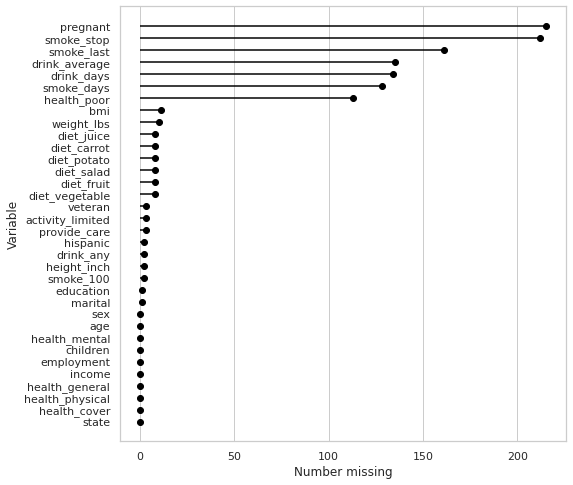

In [19]:
riskfactors_df.missing.missing_variable_plot()

 La grafica muestra que la variable pregnant es la que mayor cantidad de valores faltantes tiene, seguido de las variables smoke_stop y smoke_last

#### Histograma de la cantidad de observaciones con datos faltantes

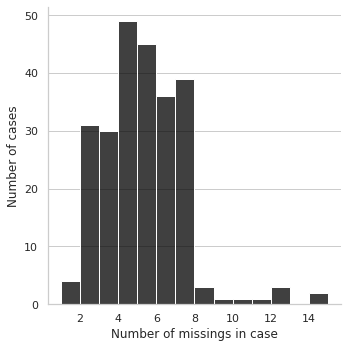

In [20]:
riskfactors_df.missing.missing_case_plot()

La grafica muestra la cantidad de observaciones y su respectiva cantidad de valores faltantes. Para este caso vemos que existen alrededor de 49 observaciones con 5 valores faltantes y 45 con 6 valores faltantes.

#### Visualizacion de datos faltantes para un rango especifico de observaciones para una variable especifica

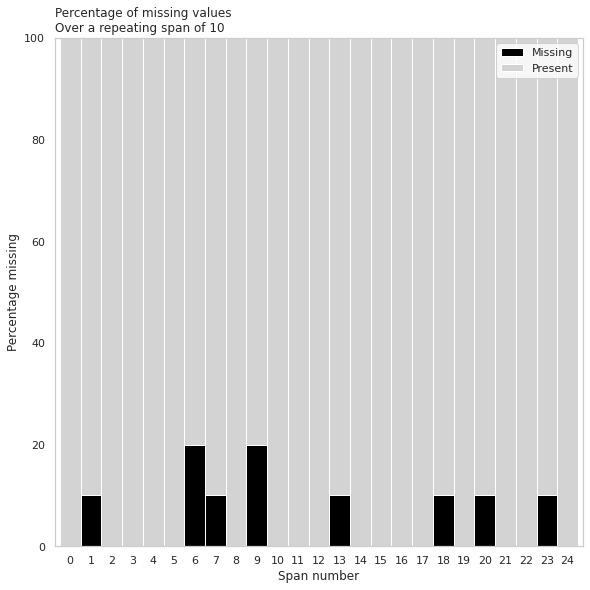

In [21]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable='weight_lbs', # variable a analizar
        span_every=10, # rango de registros
        rot=0 # rotacion de las etiquetas
    )
)

La grafica muestra la proporcion de datos faltantes por cada 10 registros de la variable weight_lbs. Observamos que entre los registros que van del 60 al 69 hay un 20% de los datos que son valores faltantes; lo mismo sucede con los registros que van del 90 al 99. 

#### Visualizacion de datos faltantes para todas las variables del DataFrame

<AxesSubplot:>

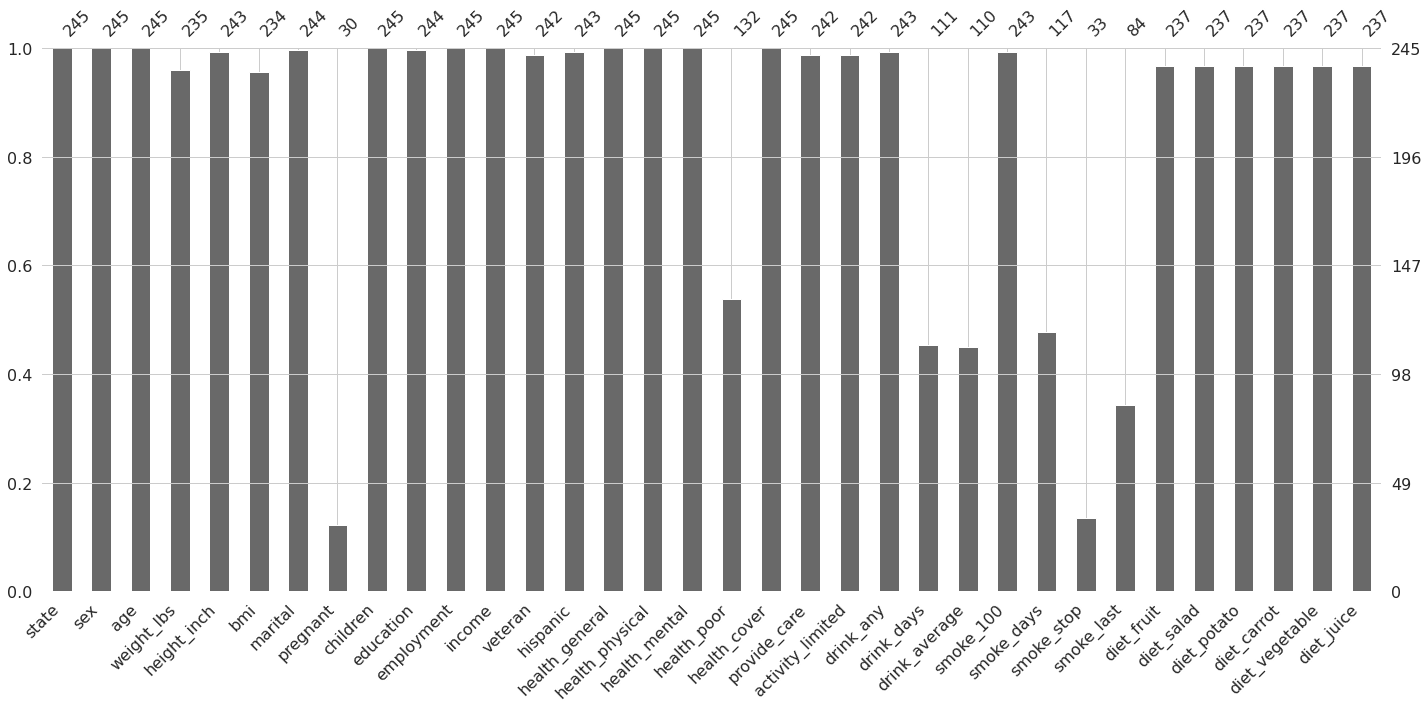

In [22]:
# missigno es una funcion de pandas
missingno.bar(df = riskfactors_df)

La grafica representa los datos faltantes con espacio en blanco por lo que podemos confirmar que las variables como pregnant, smoke_stop y smoke_last son las que mayor cantidad de valores faltantes contiene

#### Visualizacion de datos faltantes para cada variable mediante una Matriz

<AxesSubplot:>

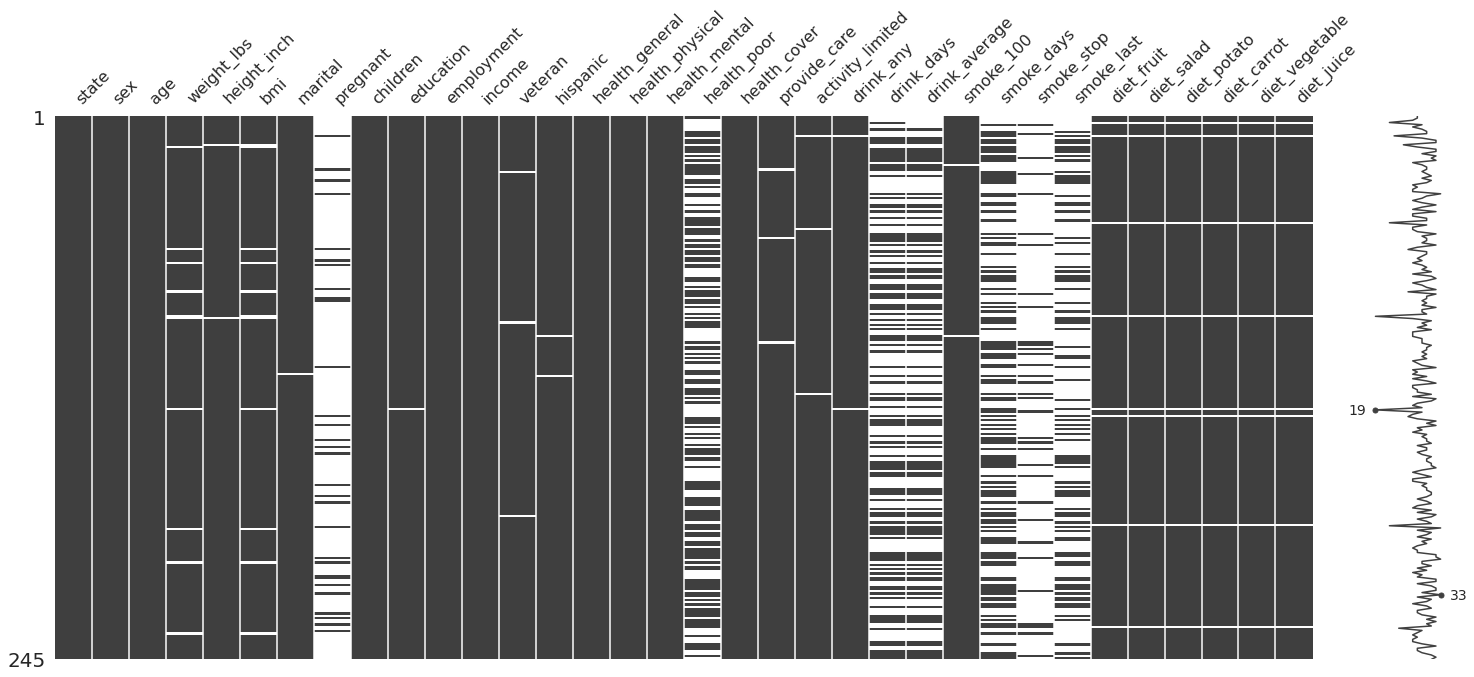

In [23]:
# es una funcion de pandas
missingno.matrix(df = riskfactors_df)

La matriz muestra las variables donde las zonas blancas son valores faltantes. Podemos observar como la variable pregnant es la que mayor cantidad de valores faltantes tiene. Ademas podemos notar que las variables drink_days y drink_average estan relacionadas debido a que muestran un patron muy similar en sus valores faltantes. La grafica tambien muestra picos al lado derecho los cuales representan observaciones donde hay mayor cantidad de valores faltantes 

#### Visualizacion de apariciones conjuntas de valores faltantes entre las variables mediante un upsetplot

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

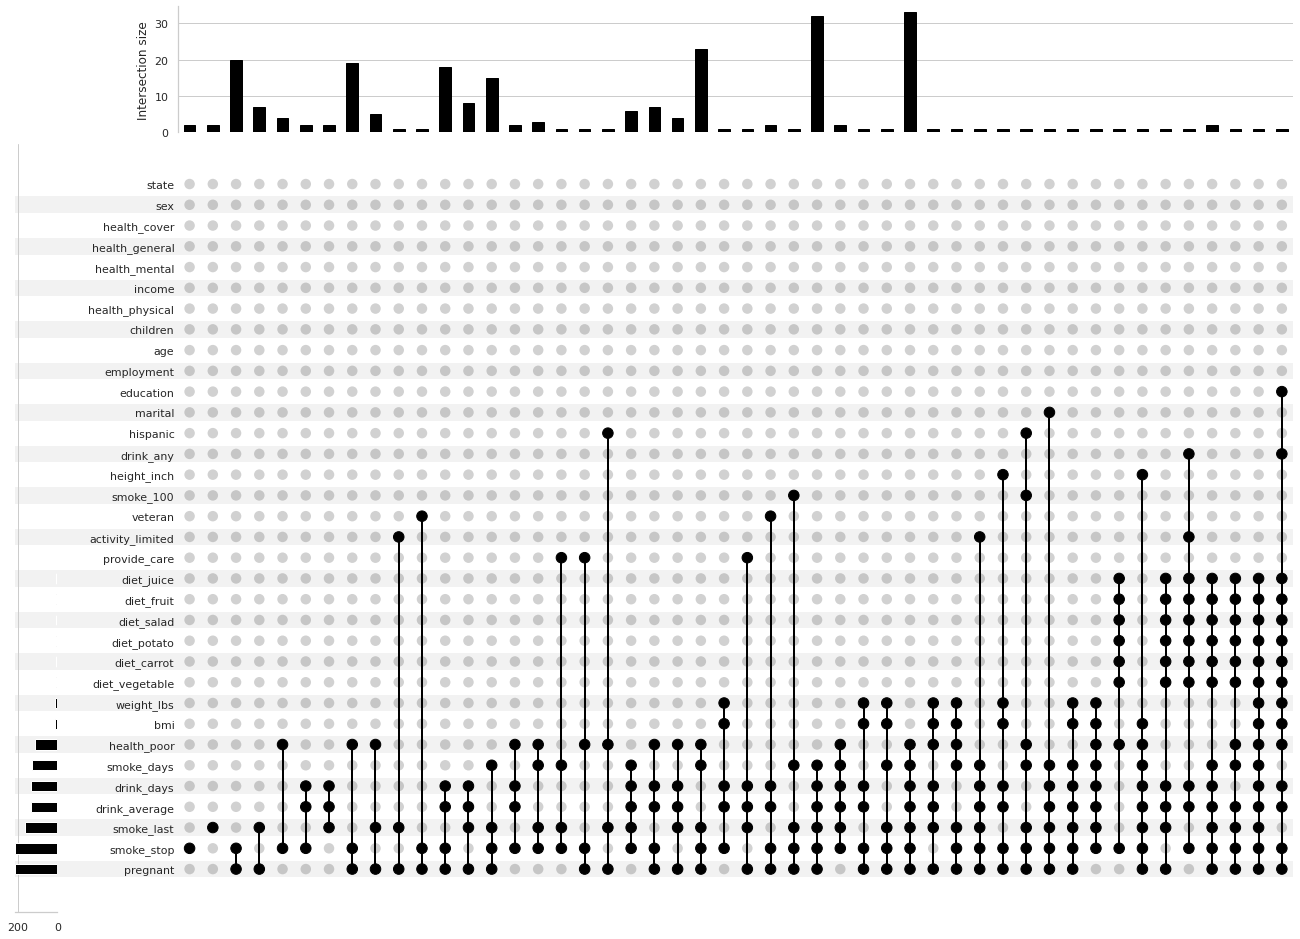

In [24]:
# para todas las variables
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables=None, # None para mostrar todas las variables
        element_size = 30 # size de las visualizaciones
    )
)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

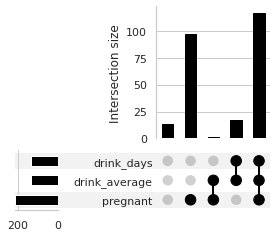

In [25]:
# para un conjunto de variables
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables=['pregnant','drink_days', 'drink_average'], # None para mostrar todas las variables
        element_size = 30 # size de las visualizaciones
    )
)

El grafico nos indica que hay mas de 100 observaciones que comparten valores faltantes para las 3 variables. Mientras que las variables drink comparten menos de 25 observaciones con valores faltantes. La variable pregnant alcanza los casi 100 observaciones cuando las variables drink no tienen valores faltantes.

## Tipos de Valores Faltantes

Para este caso, vamos a trabajar con un nuevo conjunto de datos de pacientes diagnosticados con diabetes

In [26]:
# Pima Indians Diabetes
diabetes_url = "https://nrvis.com/data/mldata/pima-indians-diabetes.csv"

In [27]:
!wget -O ./data/pima-indians-diabetes.csv { diabetes_url } -q
# !linea de comandos, 
# wget-comando para descargar datos 
# ruta para almacenar los datos + nombre, {URL}, 
# -q para que no muestre la descarga

In [28]:
# asignar los nombres de las variables y convertirlo en un dataframe
diabetes_df = pd.read_csv(
    filepath_or_buffer="./data/pima-indians-diabetes.csv", # or pima_indians_diabetes_url
    sep=",",
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]
)

In [29]:
# dataframe de trabajo
diabetes_df

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Visualizacion de valores faltantes de cada variable mediante un grafico de paleta 

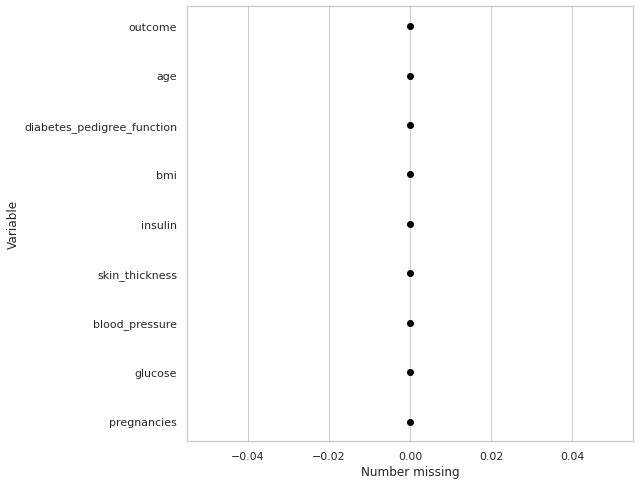

In [30]:
diabetes_df.missing.missing_variable_plot()

Del grafico notamos que aparentemente no hay valores faltantes en el dataframe. Sin embargo, al revisar la tabla del dataframe vemos que los valores faltantes vienen representados por ceros. En este caso lo que se hace es sustituir los ceros por nan para que sean detectados como valores faltantes

#### Sustitucion de Ceros por NaN

In [31]:
# sustituimos solo los valores que estan entre las variables 1 y 5 debido a que son las de
# interes
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)

#### Visualizacion de datos faltantes mediante un grafico de paletas

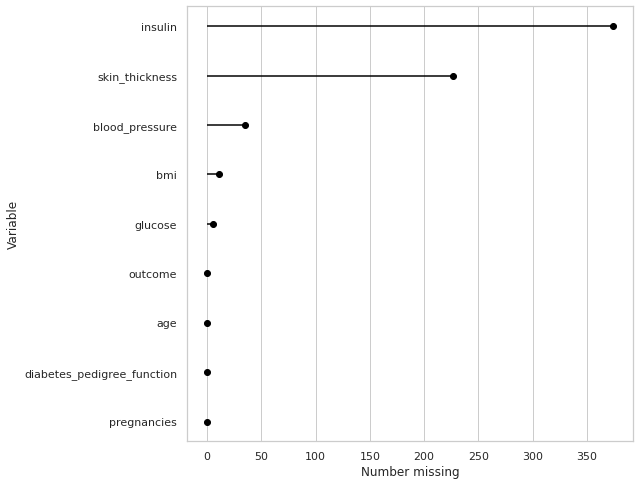

In [32]:
diabetes_df.missing.missing_variable_plot()

#### 1. Tipo MCAR

Estos son datos faltantes ocasionados por herramientas que dejan de funcionar sin ninguna razon aparente. La localizacion de valores faltantes ocurre completamente al azar

<AxesSubplot:>

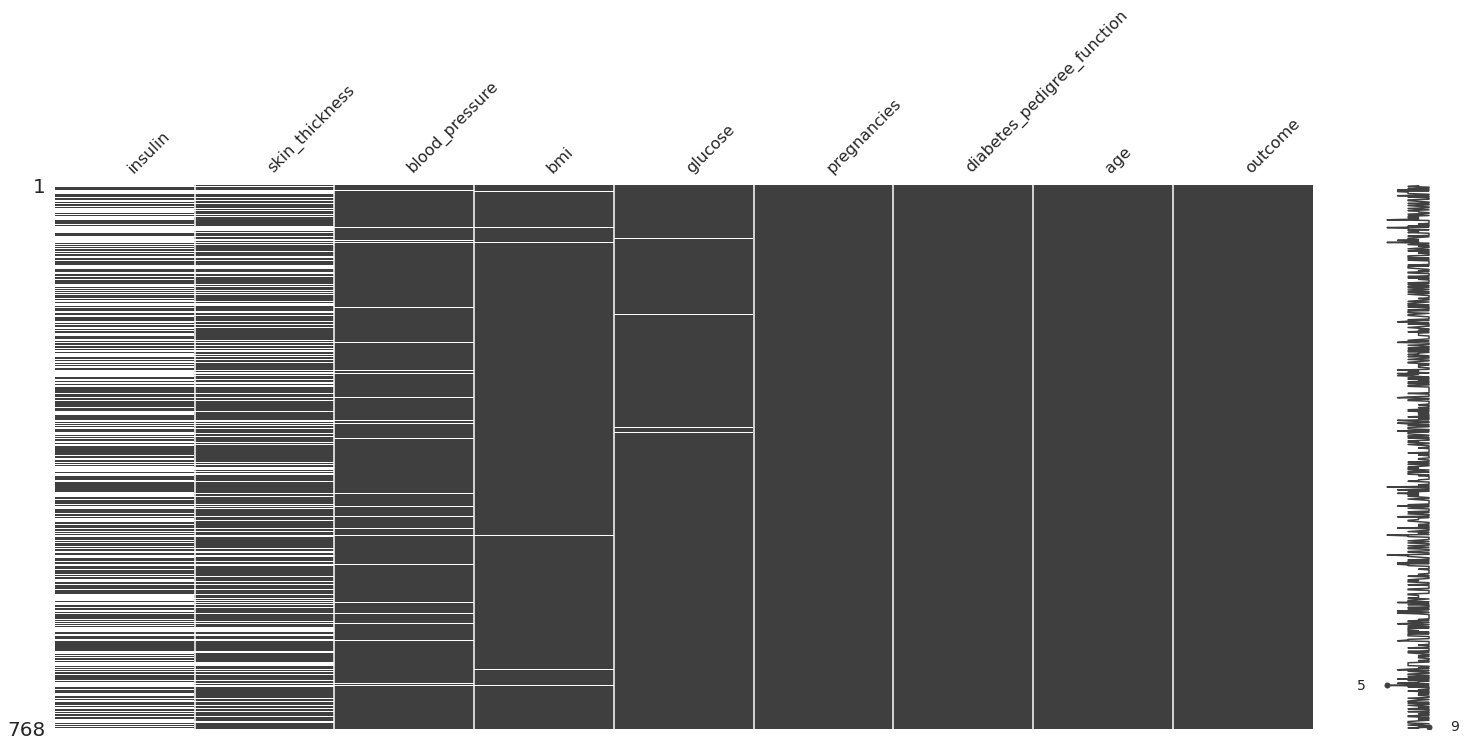

In [33]:
# ordena la variables de la qu mas tiene valores faltantes a la que menos tiene
(
    diabetes_df # dataframe
    .missing.sort_variables_by_missingness() # ordena las variable de mayor a menor cantidad de valores faltantes
    .pipe(missingno.matrix) # muestra el resultado como una matriz
)

Del grafico concluimos que en las variables bmi y glucose hay tan pocos valores faltantes que se pueden considerar valores faltantes al azar o de tipo MCAR

#### 2. Tipo MAR

Son ocasionados en fechas controladas como por ejemplo cuando se hace mantenimiento a las herramienas. La localizacion de los valores faltantes depende de otros valores observados

<AxesSubplot:>

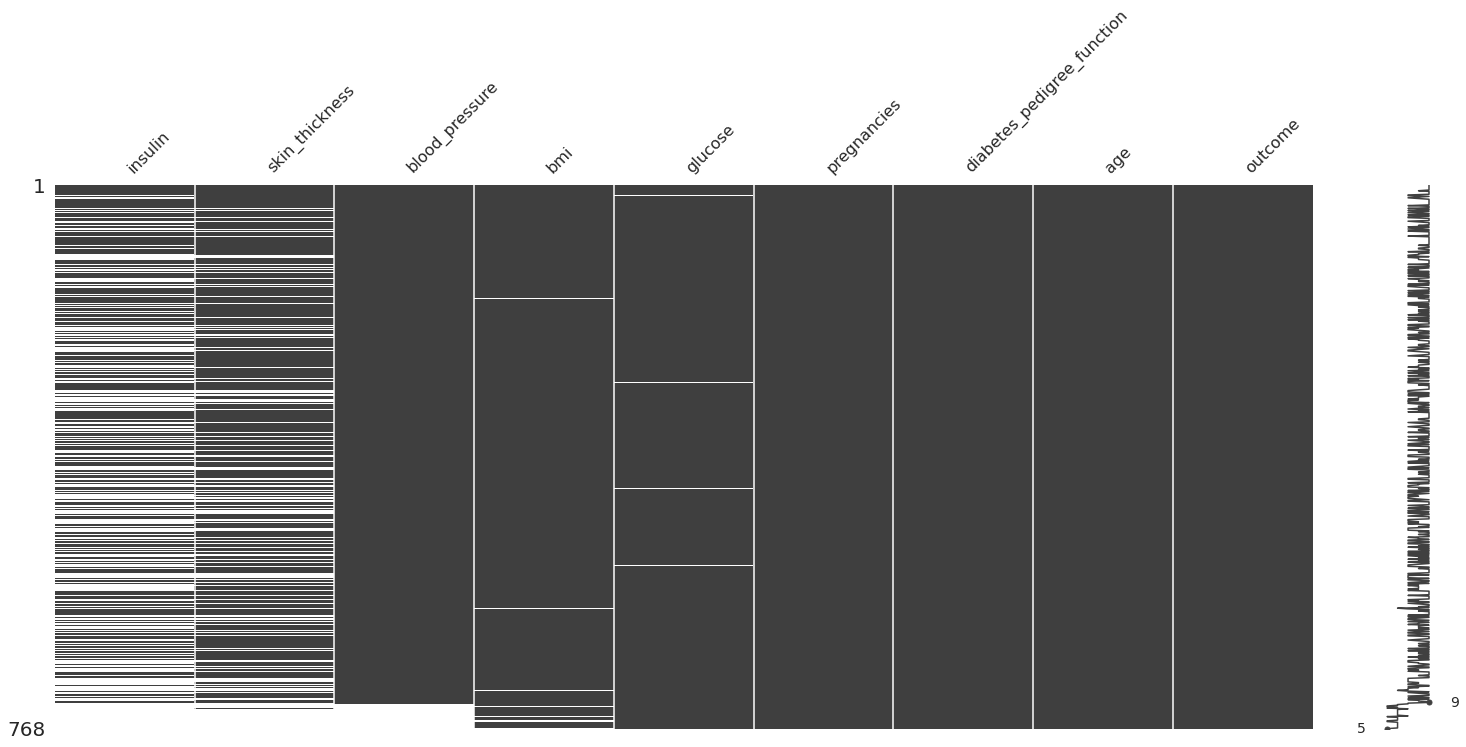

In [34]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by='blood_pressure') # ordena los valores segun una columna
    .pipe(missingno.matrix)
)

Para este caso, los valores faltantes de la variable blood_pressure pueden estar relacionados a algunos valores de insulin o de skin_thickness por lo que son de tipo MAR

#### 3. Tipo MNAR

Este tipo de datos faltantes proviene de los limites que presentan las herramientas al tratar de hacer seguimiento fuera de su rango de medicion. La localizacion de los valores faltantes depende de los valores faltantes en si mismo

<AxesSubplot:>

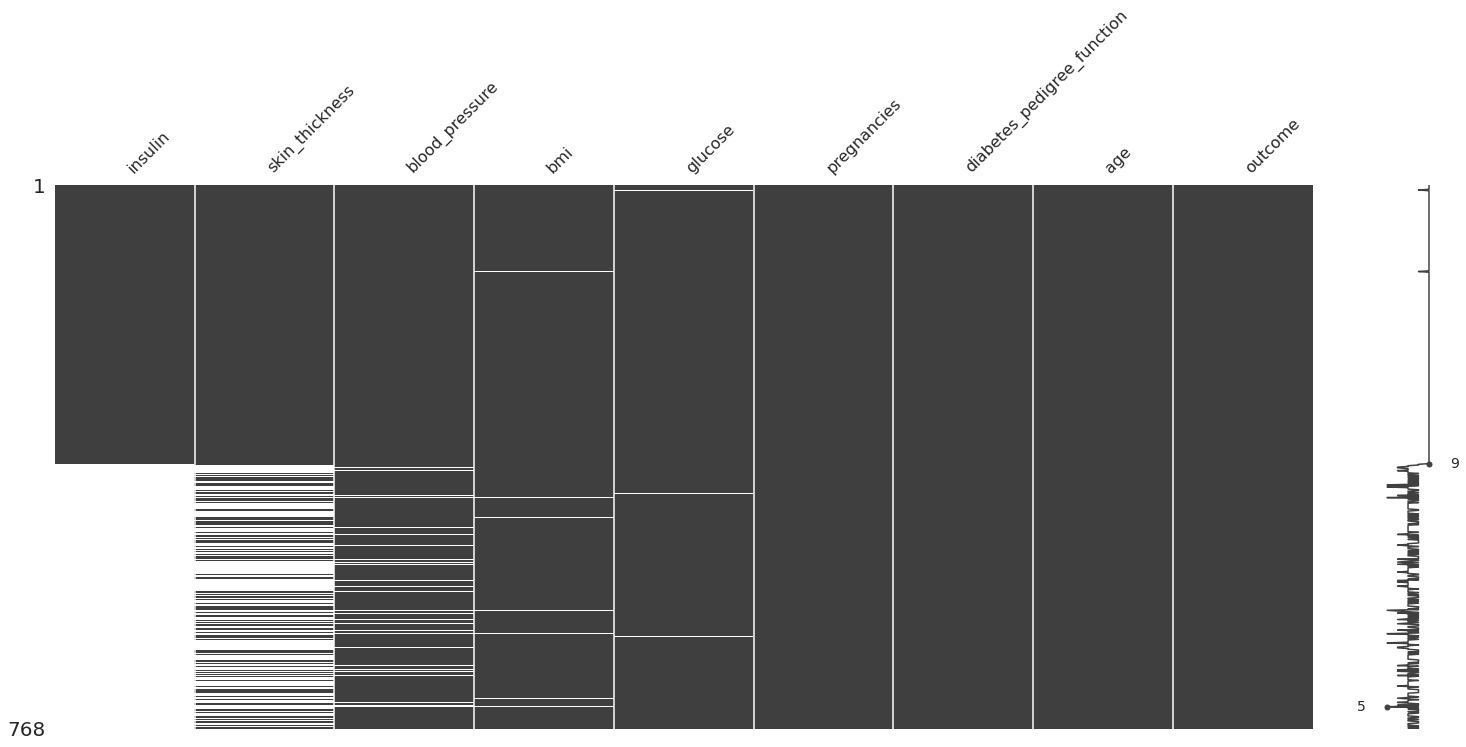

In [35]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by='insulin') # ordena los valores segun una columna
    .pipe(missingno.matrix)
)

Vemos que hay un rango de insulina en la que estan la mayoria de los valores faltantes de las demas variables por lo que concluimos que es de tipo MNAR 

No podemos tener seguridad sobre cual mecanismo incide sobre los datos para generar los valores faltantes, pero a traves de analisis y conocimiento del tema se pueden hacer suposiciones razonables

## Matriz de Sombra

Permiten establecer relaciones entre las variables que tienen todas sus observaciones y la ausencia o presencia de otras variables de forma que se pueda comparar estadisticos o visualizarlos de manera efectiva.

Para este caso, vamos a crear una matriz de sombra con los datos del dataframe riskfactor

#### Construccion de la matriz de sombra manualmente

In [36]:
(
    riskfactors_df
    .isna()                     # crea una matriz de booleanos con los datos del df
    .replace({                  # reemplaza los valores booleanos por valores informativos
        False:'Not missing',
        True: 'Missing'
    })
    .add_suffix('_NA')          # Agrega un sufijo sobre cada variable
    .pipe(
        lambda shadow_matrix: pd.concat( # concatena los valores de la matriz de sombra a la derecha del df
            [riskfactors_df, shadow_matrix],
            axis='columns'
        )
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


#### Construccion de la Matriz de sombra mediante la funcion bind_shadow_matrix

In [37]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing = True)
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


Esta funcion aplica solo para las columnas que contienen valores faltantes siempre que el parametro only_missing sea True

#### Exploracion de estadisticos utilizando las nuevas columnas de la matriz de sombra

In [38]:
# weight_lbs_NA vs age

print('Valores faltantes en la variable Peso segun la Edad ')
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .groupby(['weight_lbs_NA'])                    # agrupar por la ausencia de la variable Peso
    ['age']                                        # variable edad como referencia
    .describe()
    .reset_index()
)

Valores faltantes en la variable Peso segun la Edad 


,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


Para los valores faltantes de Peso segun la edad vemos que donde hay datos, la media de edad es de 58 y la edad maxima es de 97. Mientras que para los valores faltantes la media de edad es de 60 y la edad maxima es de 82. La cercania entre ambos resultados indican que los valores faltantes en weight_lbs no estan relacionados con age

In [39]:
# pregnant_NA vs age

print('Valores faltantes en la variable Pregnant segun Age ')
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .groupby(['pregnant_NA'])                      # agrupar por la ausencia de la variable pregnant
    ['age']                                        # variable edad como referencia
    .describe()
    .reset_index()
)

Valores faltantes en la variable Pregnant segun Age 


,pregnant_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,215.0,61.590698,15.430577,9.0,52.0,62.0,71.5,97.0
1,Not Missing,30.0,33.133333,9.212934,7.0,29.5,34.0,40.0,44.0


Para los valores faltantes de pregnant en funcion de la edad vemos que donde hay datos la edad media es de 33 y la edad maxima es de 44 que es el año donde las mujeres alcanzan su maximo de edad reproductiva. Mientras que para los valores faltantes la edad media es de 61 y el maximo de edad es de 97, etapa donde las mujeres ya pasaron su edad reproductiva. Por tanto concluimos que los valores faltantes en pregnant estan relacionados con la variable age.

In [40]:
# bmi_NA vs weight_lbs

print('Valores faltantes o no en la variable bmi_NA segun weight_lbs')
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .groupby(['bmi_NA'])                           # agrupar por la ausencia de la variable pregnant
    ['age']                                 # variable edad como referencia
    .describe()
    .reset_index()
)

Valores faltantes o no en la variable bmi_NA segun weight_lbs


,bmi_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,11.0,62.363636,15.015144,37.0,54.50,63.0,70.00,85.0
1,Not Missing,234.0,57.905983,17.611927,7.0,47.25,59.0,69.75,97.0


La cercania en los resultados de valores faltantes con valores completos indican que los valores faltantes de bmi no estan relacionados con la variable age. 

La similitud en los resultados tanto de weight como de bmi sugieren que ambos son valores de tipo MAR debido a que uno depende de las observaciones del otro.

## Visualizacion de Valores Faltantes en una variable

Permite detectar si esta ocurriendo un sesgo en la presencia o ausencia de valores faltantes ocasionados por otra variable.

#### Visualizacion de valores faltantes mediante un Diagrama de Caja 

<AxesSubplot:xlabel='weight_lbs_NA', ylabel='age'>

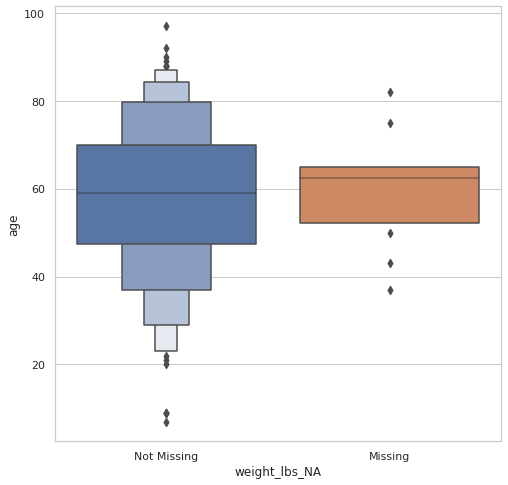

In [41]:
# Comparando los valores faltantes de la variable Peso con los valores de Edad

(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .pipe(
        lambda df: (
            sns.boxenplot(                 # diagrama de caja
                data=df,                   # dataframe donde se encuentran las variables
                x='weight_lbs_NA',         # variable con los datos faltantes
                y='age'                    # variable de comparacion
            )
        )   
    )
)

Del diagrama notamos que los valores faltantes de Peso estan por encima de la edad de 60 mientras que los valores de Peso estan por debajo de 60

#### Visualizacion de valores faltantes mediante una Funcion de Densidad

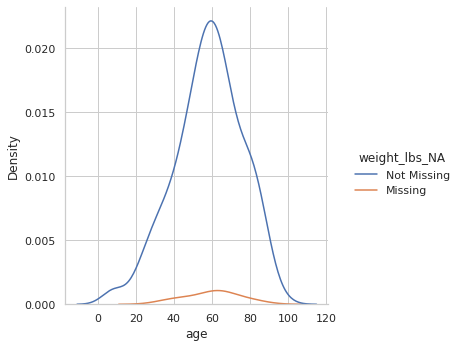

In [42]:
# Comparando los valores faltantes de la variable Peso con los valores de Edad

(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x='age',
                hue='weight_lbs_NA',
                kind='kde'
            )
        )
    )
)

La grafica de densidad tambien nos muestra como los valores faltantes del Peso estan sesgado levemente a la derecha. Cabe resltar que no es la mejor visualizacion debido a la diferencia en las densidades

#### Visualizacion de valores faltantes mediante Histogramas 

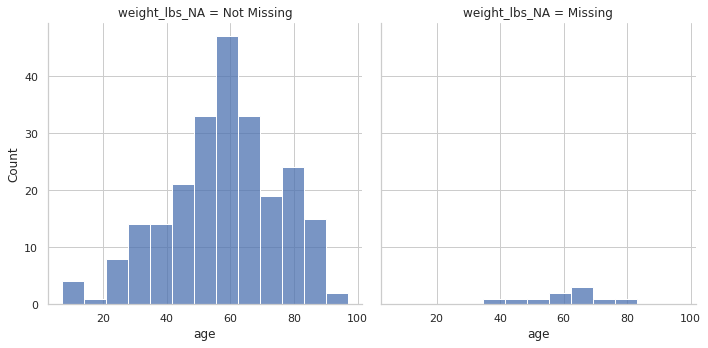

In [43]:
# Comparando los valores faltantes de la variable Peso con los valores de Edad

(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x='age',
                col='weight_lbs_NA'
            )
        )
    )
)

Este tipo de graficos son muy dificiles de comparar debido a que hay mas datos completos que faltantes

#### Visualizacion de valores faltantes mediante Histogramas Independientes

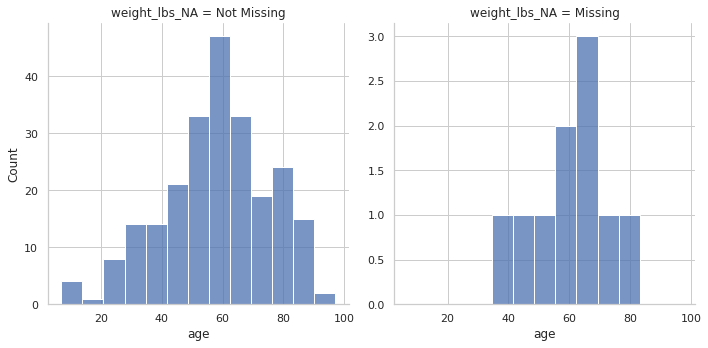

In [44]:
# Eje de las y independientes para cada grafico
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x = 'age', #variable de distribucion
                col = 'weight_lbs_NA',  #variable de comparacion
                facet_kws={
                    'sharey': False
                }               
            )
        )
    )
)

Al dejar independiente el eje Y de cada histograma la visualizacion mejora muchisimo, sin embargo, hay que tener en cuenta que estan en escalas diferentes

#### Visualizacion de datos faltantes para dos variables mediante una grilla de Histogramas

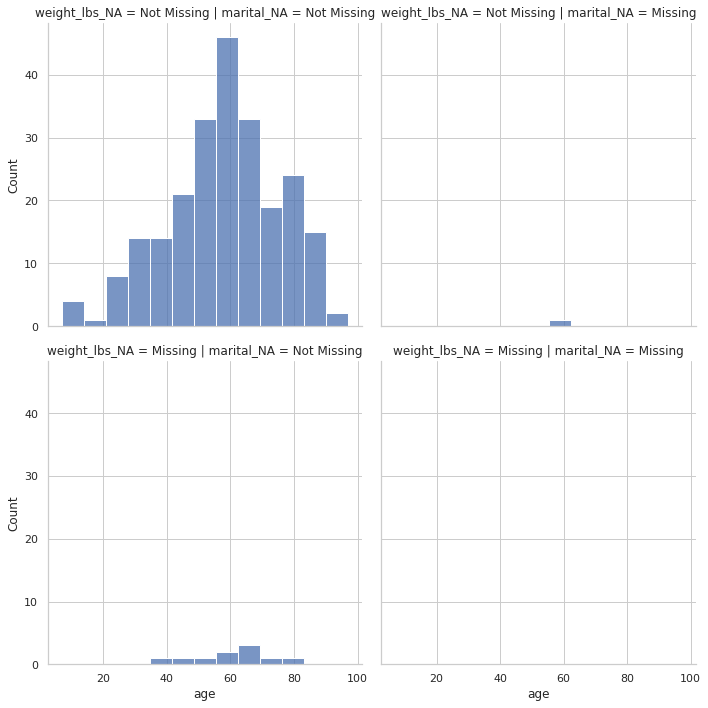

In [45]:
# comparando los valores faltantes del Peso y estado Marital con los valores de Edad

(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x = 'age', #variable de distribucion
                col = 'marital_NA',  #variable de comparacion
                row = 'weight_lbs_NA'               
            )
        )
    )
)

En la grilla notamos que no existe edades para los valores faltantes de Peso y estado Marital. Esto indica que son valores faltantes de tipo MAR en relacion con la edad, es decir, para poder obtener el Peso y estado Marital debe de saberse primero la edad de la persona.

Tambien vemos que existe un mayor numero de datos de Peso y estado Marital para la edad de 60 

## Visualizacion de valores faltantes en dos variables 

Permiten visualizar y compara dos variables cuando ambas le faltan valores. Un grafico muy util para ello, son los Scatterplot. 

Vamos a crear una funcion que agregue valores aleatorios a las variables con valores faltantes 

In [46]:
'''
Funcion que agrega valores aleatorios a las variables con valores faltantes
para visualizarlos en un eje
'''

def column_fill_with_dummies(
    column: pd.Series,
    proportion_below: float=0.10, # proporcion de los datos en la grafica
    jitter: float=0.075,          # parametro que evita el asolapamiento de los puntos de la grafica
    seed: int=42                  # semilla para la aleatoriedad
) -> pd.Series:                   # la funcion retorna una Serie

    # copiar las columnas del DataFrame
    column = column.copy(deep=True)

    # extraer los valores de las variables 
    missing_mask = column.isna()                # matriz de booleanos
    number_missing_values = missing_mask.sum()  # conteo de valores faltantes
    column_range = column.max() - column.min()  # rango de las variables

    # Datos de turno
    column_shift = column.min() - column.min()*proportion_below

    # Ruido alrededor de los puntos
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    # guarda los nuevos datos aleatorios
    column[missing_mask] = column_shift + column_jitter

    return column


#### Scatterplot para dos variables con valores faltantes

<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

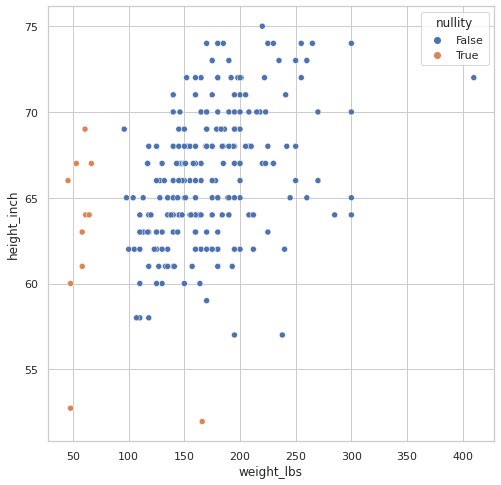

In [47]:

(
    riskfactors_df
    .select_dtypes(
        exclude='category'  # excluye las variables categoricas
    )
    .pipe(                  # selecciona solo columnas que tengan valores faltantes
        lambda df: df[df.columns[df.isna().any()]]
    )
    .missing.bind_shadow_matrix(true_string = True, false_string = False)
    .apply(
        lambda column: column if '_NA' in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter=0.075)
    )
    .assign(
        nullity = lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data = df,
                x='weight_lbs',
                y='height_inch',
                hue='nullity'
            )
        )
    )
)